In [173]:
import subprocess as sbpr
import re
from operator import itemgetter
import pandas as pd
import json
import matplotlib.pyplot as plt

In [69]:
authors = sbpr.run(['git', 'log', '--no-merges', '--after=2018-10-01 00:00:00', '--before=2018-10-03 00:00:00', '--pretty=tformat:%cn'], 
         capture_output=True,
         cwd='../intellij-community', 
         text=True).stdout.split('\n')
authors

['Alexander Lobas',
 'Vassiliy.Kudryashov',
 'Vassiliy.Kudryashov',
 'Julia Beliaeva',
 'Julia Beliaeva',
 'Julia Beliaeva',
 'peter',
 'peter',
 'peter',
 'peter',
 'Julia Beliaeva',
 'Julia Beliaeva',
 'Julia Beliaeva',
 'Julia Beliaeva',
 'Julia Beliaeva',
 'Julia Beliaeva',
 'Julia Beliaeva',
 'Julia Beliaeva',
 'Julia Beliaeva',
 'Julia Beliaeva',
 'Julia Beliaeva',
 'Vladimir Krivosheev',
 'Vladimir Krivosheev',
 'Vassiliy.Kudryashov',
 'Roman Shevchenko',
 'Daniil Ovchinnikov',
 'Daniil Ovchinnikov',
 'Daniil Ovchinnikov',
 'Vassiliy.Kudryashov',
 'Egor Ushakov',
 'Konstantin Bulenkov',
 'Mikhail Sokolov',
 'Mikhail Sokolov',
 'Ivan Semenov',
 'Dmitry Avdeev',
 'Egor Ushakov',
 'Ivan Semenov',
 'Ivan Semenov',
 'Ivan Semenov',
 'Ivan Semenov',
 'Ivan Semenov',
 'Ivan Semenov',
 'Ivan Semenov',
 'Ivan Semenov',
 'Ivan Semenov',
 'Ivan Semenov',
 'Ivan Semenov',
 'Ivan Semenov',
 'Ivan Semenov',
 'Ivan Semenov',
 'Ivan Semenov',
 'Sergey Karashevich',
 'Sergey Karashevich',
 'Alex

In [147]:
def get_tag(msg):
    m = re.match(r'\[(.+?)?\]', msg)
    if m:
        return m.group(1).lower()
    m = re.match(r'([A-Z]+?)-\d+?\D', msg)
    if m:
        return m.group(1).lower()
    m = re.match(r'([A-Za-z]+?)(-\d+?)?:', msg)
    if m and len(m.group(1)) < 10:
        return m.group(1).lower()
    return ''

In [148]:
msgs = sbpr.run(['git', 'log', '--no-merges', '--after=2014-01-01 00:00:00', '--before=2018-12-01 00:00:00', '--pretty=tformat:%save'], 
         capture_output=True,
         cwd='../intellij-community', 
         text=True).stdout.split('\n')
tags = {}
for msg in msgs:
    tag = get_tag(msg)
    if tag and tag not in tags:
        tags[tag] = 1
    elif tag:
        tags[tag] += 1

cleared_tags = {}
for tag, cnt in tags.items():
    if cnt > 30:
        cleared_tags[tag] = cnt

with open('tags.json', 'w') as ouf:
    ouf.write(json.dumps(cleared_tags, sort_keys=True, indent=4))

In [143]:
dates = []
for year in range(2014, 2019):
    for month in range(1, 13):
        date = ('{}-0{}-01' if month < 10 else '{}-{}-01').format(year, month)
        dates.append(date)

#dates = ['2014-01-01', '2014-10-03']
dates = list(zip(dates[:-1], dates[1:]))

In [106]:
author_stats = {}

for i, date in enumerate(dates):
    begin_date = date[0]
    end_date = date[1]
    print(begin_date, end_date)
    authors = sbpr.run(['git', 'log', '--no-merges', '--after={} 00:00:00'.format(begin_date), 
                        '--before={} 00:00:00'.format(end_date), '--pretty=tformat:%cn'], 
         capture_output=True,
         cwd='../intellij-community', 
         text=True).stdout.split('\n')
    for author in authors:
        if (author not in author_stats):
            author_stats[author] = [0 for _ in range(len(dates) + 1)]
            author_stats[author][0] = begin_date
        author_stats[author][i + 1] += 1
        
#print(author_stats)

2014-01-01 2014-02-01
2014-02-01 2014-03-01
2014-03-01 2014-04-01
2014-04-01 2014-05-01
2014-05-01 2014-06-01
2014-06-01 2014-07-01
2014-07-01 2014-08-01
2014-08-01 2014-09-01
2014-09-01 2014-10-01
2014-10-01 2014-11-01
2014-11-01 2014-12-01
2014-12-01 2015-01-01
2015-01-01 2015-02-01
2015-02-01 2015-03-01
2015-03-01 2015-04-01
2015-04-01 2015-05-01
2015-05-01 2015-06-01
2015-06-01 2015-07-01
2015-07-01 2015-08-01
2015-08-01 2015-09-01
2015-09-01 2015-10-01
2015-10-01 2015-11-01
2015-11-01 2015-12-01
2015-12-01 2016-01-01
2016-01-01 2016-02-01
2016-02-01 2016-03-01
2016-03-01 2016-04-01
2016-04-01 2016-05-01
2016-05-01 2016-06-01
2016-06-01 2016-07-01
2016-07-01 2016-08-01
2016-08-01 2016-09-01
2016-09-01 2016-10-01
2016-10-01 2016-11-01
2016-11-01 2016-12-01
2016-12-01 2017-01-01
2017-01-01 2017-02-01
2017-02-01 2017-03-01
2017-03-01 2017-04-01
2017-04-01 2017-05-01
2017-05-01 2017-06-01
2017-06-01 2017-07-01
2017-07-01 2017-08-01
2017-08-01 2017-09-01
2017-09-01 2017-10-01
2017-10-01

In [107]:
with open('commit_stats.csv', 'w') as ouf:
    fields = ['author', 'first_commit']
    for date in dates:
        fields.append(date[0])
    ouf.write(';'.join(fields) + '\n')
    for author, stats in sorted(author_stats.items(), key=itemgetter(0)):
        if author:
            ouf.write(author + ';' + ';'.join(map(str, stats)) + '\n')

In [215]:
commit_data = pd.read_csv("commit_stats.csv", index_col='author', sep=';', na_values='')
commit_data

,first_commit,2014-01-01,2014-02-01,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,...,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01
author,,,,,,,,,,,,,,,,,,,,,
ARostovsky,2017-08-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adam Batkin,2015-11-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aleksandr,2016-02-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aleksandr Samofalov,2016-06-01,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Aleksey Pivovarov,2014-01-01,1,67,31,11,8,17,24,36,77,...,98,67,78,117,56,133,82,86,54,0
Aleksey Rostovskiy,2017-10-01,0,0,0,0,0,0,0,0,0,...,4,5,3,7,2,4,7,11,17,0
Aleksey Zezukin,2014-10-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alexander Chernikov,2015-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alexander Doroshko,2014-02-01,0,6,1,2,2,2,1,0,3,...,0,2,5,2,4,4,0,1,5,0


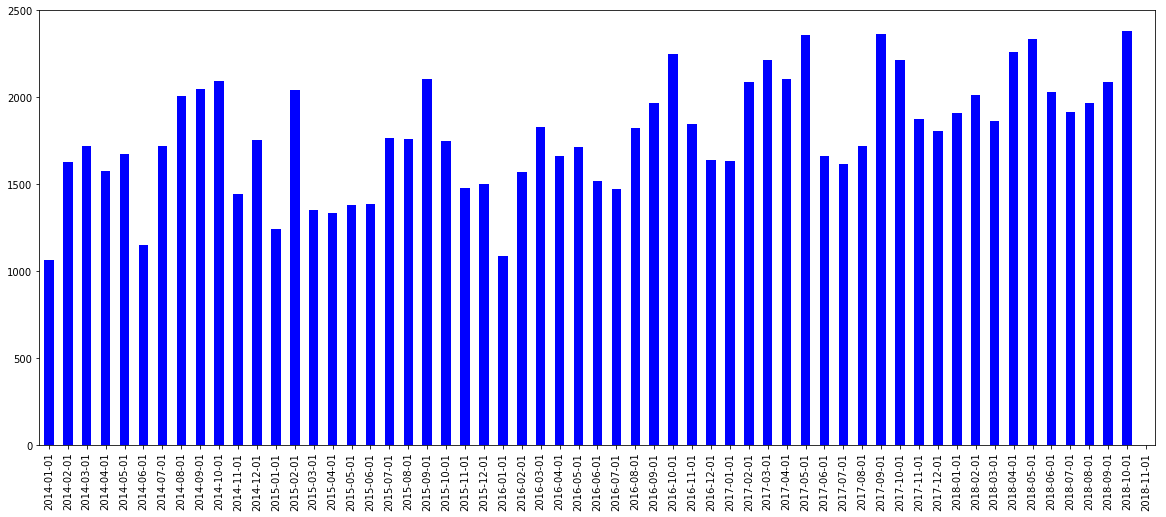

In [216]:
commit_number = commit_data.sum(axis=0, numeric_only=True)

commit_number.plot(kind='bar', figsize=(20, 8), color='b', use_index=True)
plt.show()

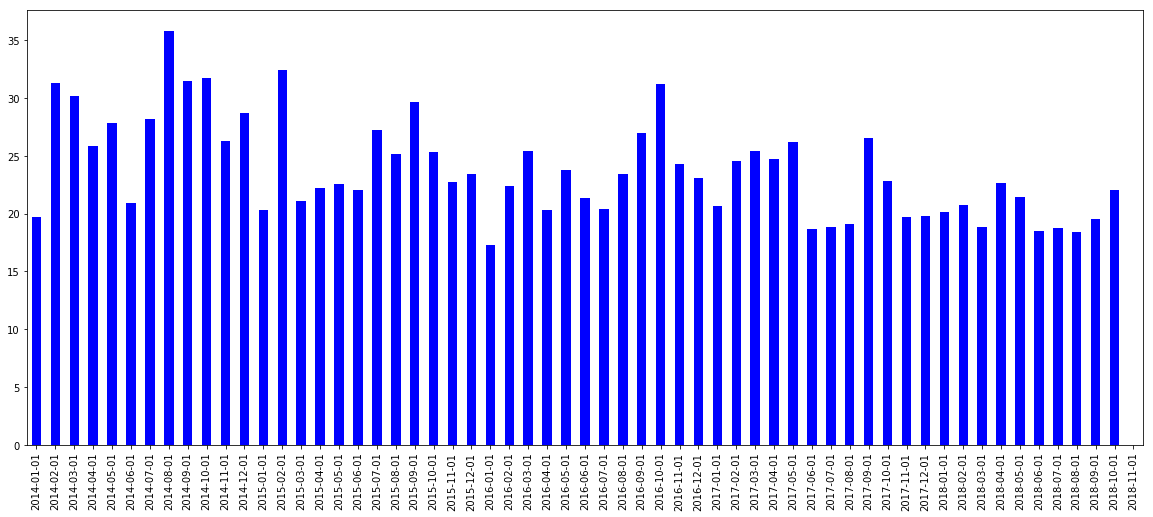

In [217]:
commit_average = commit_data[commit_data > 0].mean(axis=0)

commit_average.plot(kind='bar', figsize=(20, 8), color='b', use_index=True)
plt.show()

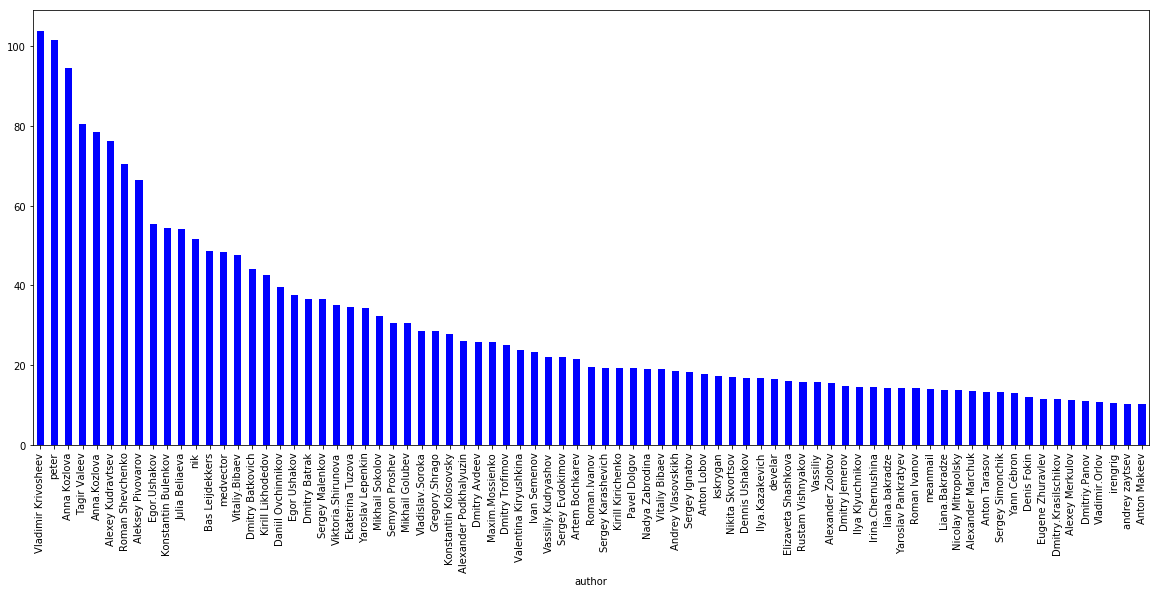

In [233]:
commit_average_more10 = commit_data[commit_data > 0].mean(axis=1, numeric_only=True)
commit_average_more10 = commit_average_top10[commit_average_more10 > 10.0].sort_values(ascending=False)

commit_average_more10.plot(kind='bar', figsize=(20, 8), color='b', use_index=True)
plt.show()

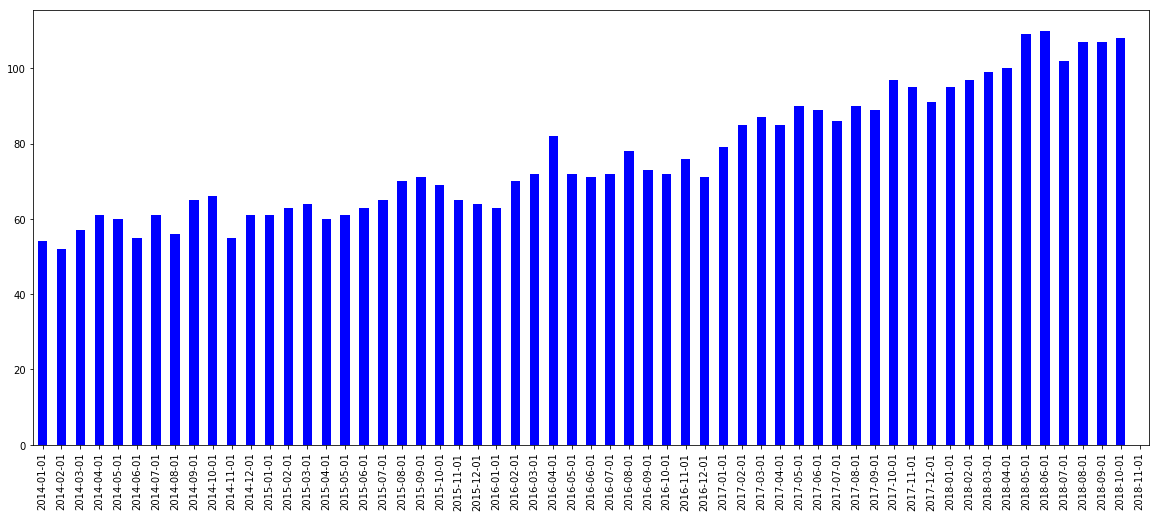

In [197]:
commiters_number = commit_data[commit_data > 0].count(axis=0, numeric_only=True)

commiters_number.plot(kind='bar', figsize=(20, 8), color='b', use_index=True)
plt.show()

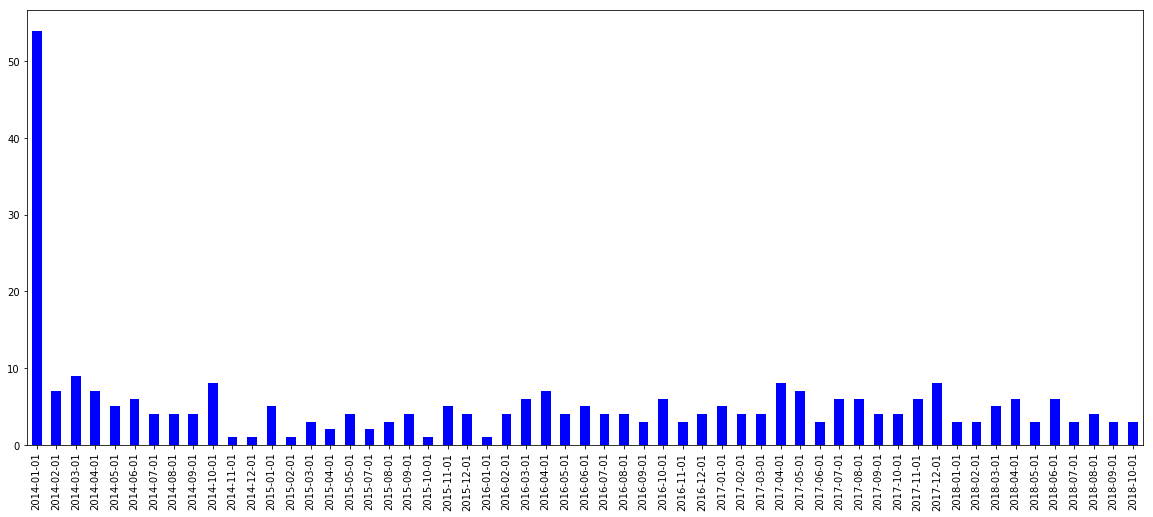

In [209]:
new_commiters = commit_data['first_commit'].value_counts().sort_index()

new_commiters.plot(kind='bar', figsize=(20, 8), color='b', use_index=True)
plt.show()

In [149]:
proj_stats = {}

for i, date in enumerate(dates):
    begin_date = date[0]
    end_date = date[1]
    print(begin_date, end_date)
    projs = sbpr.run(['git', 'log', '--no-merges', '--after={} 00:00:00'.format(begin_date), 
                        '--before={} 00:00:00'.format(end_date), '--pretty=tformat:%s'], 
         capture_output=True,
         cwd='../intellij-community', 
         text=True).stdout.split('\n')
    for proj in projs:
        proj = get_tag(proj)
        if proj in cleared_tags:
            if proj not in proj_stats:
                proj_stats[proj] = [0 for _ in range(len(dates) + 1)]
                proj_stats[proj][0] = begin_date
            proj_stats[proj][i + 1] += 1

2014-01-01 2014-02-01
2014-02-01 2014-03-01
2014-03-01 2014-04-01
2014-04-01 2014-05-01
2014-05-01 2014-06-01
2014-06-01 2014-07-01
2014-07-01 2014-08-01
2014-08-01 2014-09-01
2014-09-01 2014-10-01
2014-10-01 2014-11-01
2014-11-01 2014-12-01
2014-12-01 2015-01-01
2015-01-01 2015-02-01
2015-02-01 2015-03-01
2015-03-01 2015-04-01
2015-04-01 2015-05-01
2015-05-01 2015-06-01
2015-06-01 2015-07-01
2015-07-01 2015-08-01
2015-08-01 2015-09-01
2015-09-01 2015-10-01
2015-10-01 2015-11-01
2015-11-01 2015-12-01
2015-12-01 2016-01-01
2016-01-01 2016-02-01
2016-02-01 2016-03-01
2016-03-01 2016-04-01
2016-04-01 2016-05-01
2016-05-01 2016-06-01
2016-06-01 2016-07-01
2016-07-01 2016-08-01
2016-08-01 2016-09-01
2016-09-01 2016-10-01
2016-10-01 2016-11-01
2016-11-01 2016-12-01
2016-12-01 2017-01-01
2017-01-01 2017-02-01
2017-02-01 2017-03-01
2017-03-01 2017-04-01
2017-04-01 2017-05-01
2017-05-01 2017-06-01
2017-06-01 2017-07-01
2017-07-01 2017-08-01
2017-08-01 2017-09-01
2017-09-01 2017-10-01
2017-10-01

In [150]:
with open('proj_stats.csv', 'w') as ouf:
    fields = ['proj', 'first_commit']
    for date in dates:
        fields.append(date[0])
    ouf.write(';'.join(fields) + '\n')
    for proj, stats in sorted(proj_stats.items(), key=itemgetter(0)):
        if proj:
            ouf.write(proj + ';' + ';'.join(map(str, stats)) + '\n')

In [151]:
proj_data = pd.read_csv("proj_stats.csv", sep=';', na_values='')
proj_data

,proj,first_commit,2014-01-01,2014-02-01,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,...,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01
0,cleanup,2014-02-01,0,1,0,1,0,2,4,2,...,4,14,13,20,4,13,6,11,14,0
1,coverage,2014-01-01,4,1,3,0,0,1,1,0,...,0,0,0,9,0,1,1,0,0,0
2,cpp,2014-03-01,0,0,2,0,0,0,0,18,...,11,7,6,19,2,4,17,10,5,0
3,dbe,2014-02-01,0,2,0,0,0,4,4,2,...,2,4,1,1,1,1,0,1,2,0
4,devkit,2014-01-01,6,1,0,2,18,1,6,0,...,8,5,10,4,10,2,3,7,3,0
5,dfa,2014-01-01,2,0,4,3,1,3,5,0,...,4,3,3,3,1,1,4,2,0,0
6,diff,2014-01-01,5,37,14,0,2,17,18,19,...,15,7,6,3,3,29,9,2,2,0
7,ea,2014-01-01,45,27,52,29,47,28,23,52,...,24,24,10,26,43,27,14,18,31,0
8,editor,2014-10-01,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,0,0,0,0
9,edu,2014-08-01,0,0,0,0,0,0,0,4,...,0,0,1,0,0,0,0,0,1,0
